In [41]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

Importo dei csv test e train in un unico dataframe 

In [42]:
#df_test = pd.read_csv('data/test.csv')
#df_train = pd.read_csv('data/train.csv')
#df = pd.concat([df_test, df_train])

#dataset senza NaN
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Importo del dizionario del dataset

In [43]:
df_dict = pd.read_csv('data/dictionary.csv')
display(df_dict)

,Variable,Definition,Key
0,survival,Survival,"0 = No, 1 = Yes"
1,pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd"
2,sex,Sex,NaN
3,Age,Age in years,NaN
4,sibsp,# of siblings / spouses aboard the Titanic,NaN
5,parch,# of parents / children aboard the Titanic,NaN
6,ticket,Ticket number,NaN
7,fare,Passenger fare,NaN
8,cabin,Cabin number,NaN
9,embarked,Port of Embarkation,"C = Cherbourg, Q = Queenstown, S = Southampton"


#### Analizziamo le tipologie di variabili che abbiamo a disposizione.

Variabili **categoriche**:
 - Sex (male/female);
 - Pclass (3rd/2nd/1st);
 - Embarked (port);
 - Survived (true/false).

Variabili **ordinali**:
 - Pclass (3rd/2nd/1st);
 - Sibsp (siblings+spouse);
 - Parch (parents+children).

Variabili **continue**:
 - Age;
 - Fare (price of ticket).

Non considerate:
 - PasssengerId;
 - Name;
 - Cabin.

In [44]:
df_survived = df['Survived'].value_counts(dropna=False)

<Axes: xlabel='Survived'>

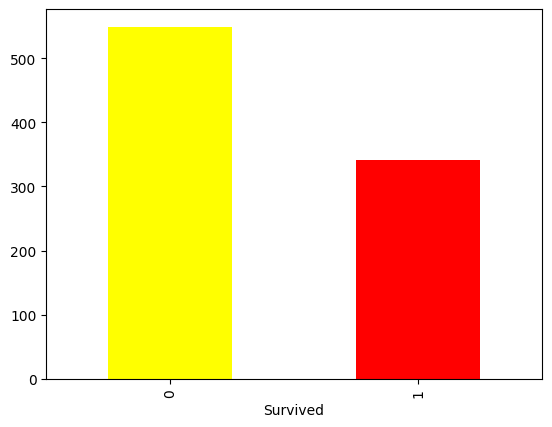

In [45]:
plt.figure()
df_survived.plot(kind='bar', color=['yellow', 'red', 'brown'])

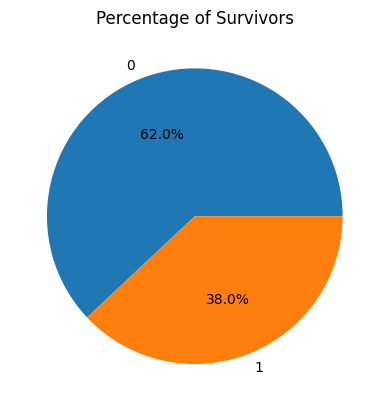

In [46]:

# Data for the pie chart
df_survived_relative = df['Survived'].value_counts(dropna=False, normalize=True) *100
df_survived_relative = df_survived_relative.round()
labels = list(df_survived_relative.index)
values = list(df_survived_relative)

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Percentage of Survivors')

# Display the chart
plt.show()

#### Dall'analisi dei sopravvissuti emerge che la maggior parte non ce l'ha fatta. Ora vedremo altre variabili in relazione a questo dato.

In [50]:
df.groupby(by=['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64